<a href="https://colab.research.google.com/github/lzy112/stackline_takehome_assessment/blob/main/stackline_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load Data


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the data from the CSV file
file_path = '/content/stackline_data.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Price Product A ($),Sales Product A (millions of unit),Price Product B ($),Sales Product B (millions of unit)
0,6.62,64.152047,6.75,54.512467
1,8.71,38.973806,12.67,0.000000
2,7.07,64.686109,9.91,31.309992
3,6.08,71.023195,5.42,66.603478
4,5.94,69.913545,12.82,0.000000


# Clean the Data

In [2]:
# Remove rows with missing values
cleaned_data = data.dropna()

# Extracting relevant columns for plotting after cleaning
price_a_clean = cleaned_data['Price Product A ($)']
sales_a_clean = cleaned_data['Sales Product A (millions of unit)']
price_b_clean = cleaned_data['Price Product B ($)']
sales_b_clean = cleaned_data['Sales Product B (millions of unit)']


# Plot the Data

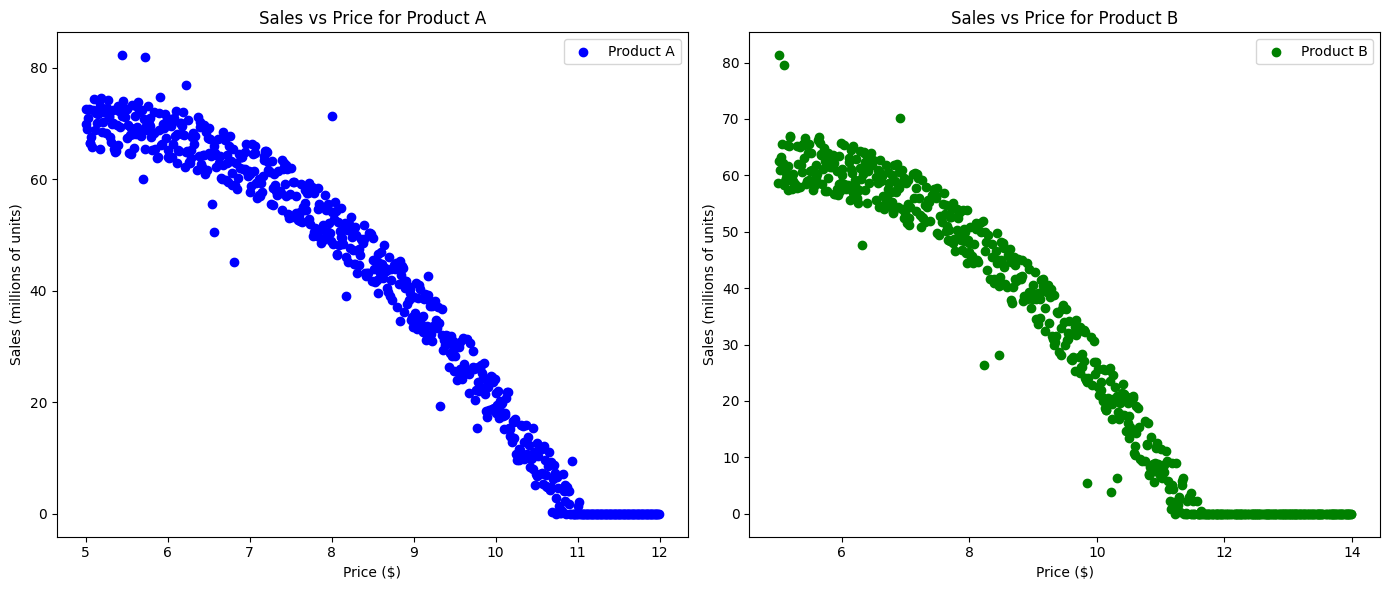

In [5]:
# Plotting the data for Product A
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(price_a_clean, sales_a_clean, color='blue', label='Product A')
plt.xlabel('Price ($)')
plt.ylabel('Sales (millions of units)')
plt.title('Sales vs Price for Product A')
plt.legend()

# Plotting the data for Product B
plt.subplot(1, 2, 2)
plt.scatter(price_b_clean, sales_b_clean, color='green', label='Product B')
plt.xlabel('Price ($)')
plt.ylabel('Sales (millions of units)')
plt.title('Sales vs Price for Product B')
plt.legend()

plt.tight_layout()
plt.show()

# Define Polynomial Regression Function

In [6]:
# Define a function to fit polynomial regression and find the optimal price
def fit_polynomial_regression(price, sales, degree=2):
    # Transform the price data to polynomial features
    poly = PolynomialFeatures(degree=degree)
    price_poly = poly.fit_transform(price.values.reshape(-1, 1))

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(price_poly, sales)

    # Generate a range of prices to predict sales
    price_range = np.linspace(price.min(), price.max(), 100).reshape(-1, 1)
    price_range_poly = poly.transform(price_range)
    sales_pred = model.predict(price_range_poly)

    # Find the price that maximizes sales
    optimal_price = price_range[np.argmax(sales_pred)]
    return model, optimal_price, price_range, sales_pred

# Fit the Model and Predict Sales

In [7]:
# Fit polynomial regression for Product A
model_a_clean, optimal_price_a_clean, price_range_a_clean, sales_pred_a_clean = fit_polynomial_regression(price_a_clean, sales_a_clean)

# Fit polynomial regression for Product B
model_b_clean, optimal_price_b_clean, price_range_b_clean, sales_pred_b_clean = fit_polynomial_regression(price_b_clean, sales_b_clean)

# Calculate Total Revenue and Determine Optimal Prices

In [8]:
# Calculate total revenue for each price point in the range for Product A
total_revenue_a = price_range_a_clean.flatten() * sales_pred_a_clean

# Calculate total revenue for each price point in the range for Product B
total_revenue_b = price_range_b_clean.flatten() * sales_pred_b_clean

# Find the price that maximizes total revenue for each product
optimal_price_revenue_a = price_range_a_clean[np.argmax(total_revenue_a)]
optimal_price_revenue_b = price_range_b_clean[np.argmax(total_revenue_b)]

# Plot the Results

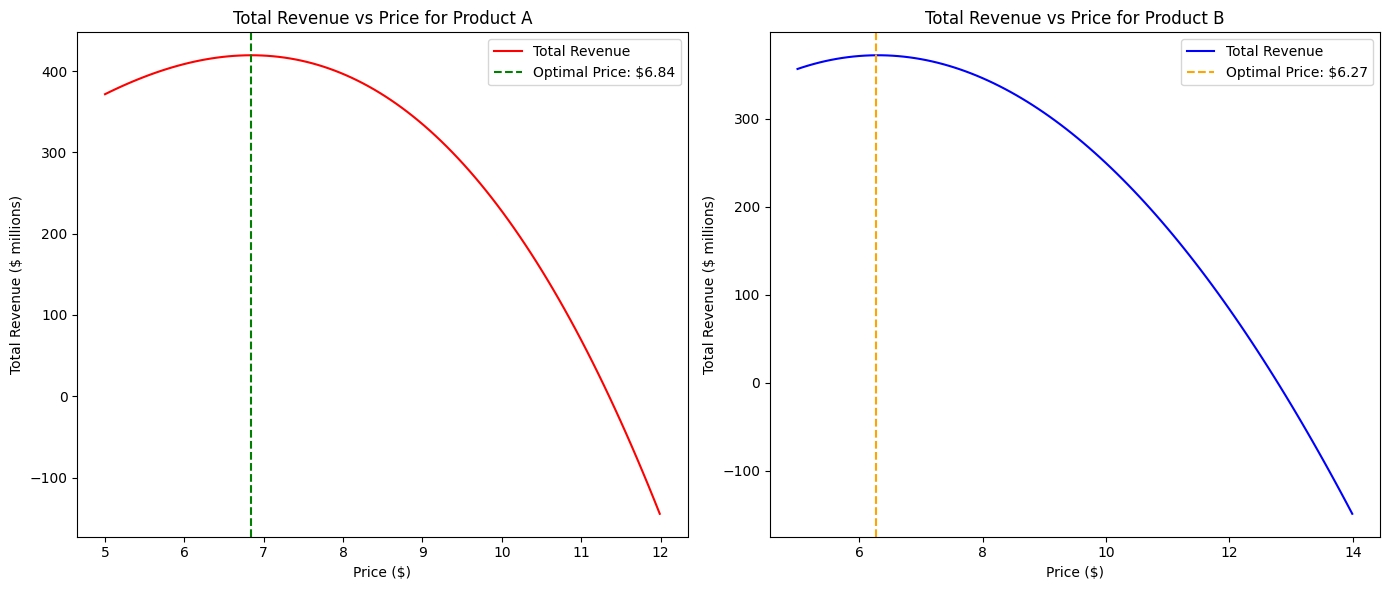

(6.835757575757537, 6.271313131313104)

In [9]:
# Plot the total revenue for both products
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(price_range_a_clean, total_revenue_a, color='red', label='Total Revenue')
plt.axvline(optimal_price_revenue_a, color='green', linestyle='--', label=f'Optimal Price: ${optimal_price_revenue_a[0]:.2f}')
plt.xlabel('Price ($)')
plt.ylabel('Total Revenue ($ millions)')
plt.title('Total Revenue vs Price for Product A')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(price_range_b_clean, total_revenue_b, color='blue', label='Total Revenue')
plt.axvline(optimal_price_revenue_b, color='orange', linestyle='--', label=f'Optimal Price: ${optimal_price_revenue_b[0]:.2f}')
plt.xlabel('Price ($)')
plt.ylabel('Total Revenue ($ millions)')
plt.title('Total Revenue vs Price for Product B')
plt.legend()

plt.tight_layout()
plt.show()

# Print the optimal prices for revenue
optimal_price_revenue_a[0], optimal_price_revenue_b[0]